### Decision Tree Regressor!

Decision tree regressors are slightly different to that of Decision tree classifiers in terms of calculating the loss in which case, the metric mean squared error is used!

Here, we'll take the thresholds as per the data and then for each thresholds, the split's impurity gap is calculated but we consider the mean squared error of a region while calculating!

For this, we need predictions, predictions in terms of regression is just the average of labels where as in case of regression, we took probabilities and then calculated the gini impurity!

Now, the split in which the highest impurity gap is selected as our split!



In [3]:
from sklearn import tree
from sklearn import metrics
import seaborn
import matplotlib.pyplot as plt
import numpy as np
dataset=np.array([[1],[2],[3],[4],[5]])
labels=np.array([[1.5],[2.3],[3],[2],[1.7]])
dataset,labels

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1.5],
        [2.3],
        [3. ],
        [2. ],
        [1.7]]))

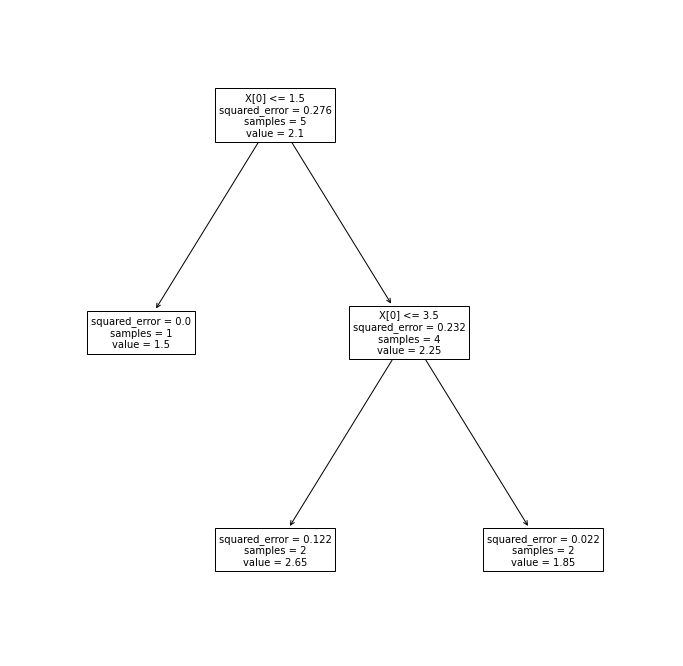

In [4]:
sample_tree=tree.DecisionTreeRegressor(max_depth=2)
sample_tree=sample_tree.fit(dataset,labels)

from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plt.title("Decision tree trained on all the iris features")
tree.plot_tree(sample_tree, fontsize=10)
#plt.savefig('tree_high_dpi', dpi=100)
plt.show()

In case of regression, the loss or objective function is chosen as the Mean Squared Error!

The split is based on the impurity gap which is calculated with the help of mean squared error which is the mean of the squared difference between the prediction and the true label!

In regression, the prediction is just the average of labels in the region!

In [5]:
import numpy as np
def calc_mean_sq_err(lst):
    pred=np.mean(lst)
    mse=0
    for i in lst:
        mse+=np.square(i-pred)
    mse=mse*(1/len(lst))
    return mse

In [15]:
threshold=[1.5,2.5,3.5,4.5]
d=[1,2,3,4,5]
l=[1.5,2.3,3,2,1.7]

impurity_of_whole_dataset=len(d)*calc_mean_sq_err(l)
impurity_dict={}
for i in threshold:
    ls=[]
    rs=[]
    ls=[l[j] for j in range(0,len(d)) if d[j]<=i]
    rs=[l[k] for k in range(0,len(d)) if d[k]>i]
    print('The threshold is ',i)
    print('The left region is ',ls)
    mse_ls=calc_mean_sq_err(ls)
    print('MSE is ',mse_ls)
    print('The right region is ',rs)
    mse_rs=calc_mean_sq_err(rs)
    print('MSE is ',mse_rs)
    print(impurity_of_whole_dataset)
    impurity=impurity_of_whole_dataset-(len(ls)*mse_ls + len(rs)*mse_rs)
    impurity_dict[i]=impurity
    print('The impurity of this split is ', impurity)
    print('****************')
    
print("The best threshold came with the split "+str(max(impurity_dict, key=impurity_dict.get)))

The threshold is  1.5
The left region is  [1.5]
MSE is  0.0
The right region is  [2.3, 3, 2, 1.7]
MSE is  0.23249999999999998
1.3800000000000001
The impurity of this split is  0.4500000000000002
****************
The threshold is  2.5
The left region is  [1.5, 2.3]
MSE is  0.15999999999999992
The right region is  [3, 2, 1.7]
MSE is  0.3088888888888889
1.3800000000000001
The impurity of this split is  0.13333333333333353
****************
The threshold is  3.5
The left region is  [1.5, 2.3, 3]
MSE is  0.37555555555555553
The right region is  [2, 1.7]
MSE is  0.022500000000000006
1.3800000000000001
The impurity of this split is  0.2083333333333337
****************
The threshold is  4.5
The left region is  [1.5, 2.3, 3, 2]
MSE is  0.295
The right region is  [1.7]
MSE is  0.0
1.3800000000000001
The impurity of this split is  0.20000000000000018
****************
The best threshold came with the split 1.5


So, therefore the initial split happened with the condition as x[0]<=1.5 by the decisiontree regressor

In [16]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
wine_data = pd.read_csv("./archive/winequality-red.csv")

In [17]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine_data_data=wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']]

In [21]:
wine_data_target=wine_data[['pH']]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine_data_data,wine_data_target,random_state=9)

In [23]:
from sklearn import tree
from sklearn import metrics

clf=tree.DecisionTreeRegressor(max_depth=3)
cols=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

clf.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [24]:
train_predicitons=clf.predict(X_train)

In [26]:
clf.score(X_train,y_train)

0.5516105381424217

In [28]:
from sklearn import tree
from sklearn import metrics
training_accuracy=[]
testing_accuracy=[]
for i in range(1,25):
    
    my_tree=tree.DecisionTreeRegressor(max_depth=i)
    my_tree.fit(X_train,y_train)
    train_score=my_tree.score(X_train,y_train)
    test_score=my_tree.score(X_test,y_test)
    training_accuracy.append(train_score)
    testing_accuracy.append(test_score)


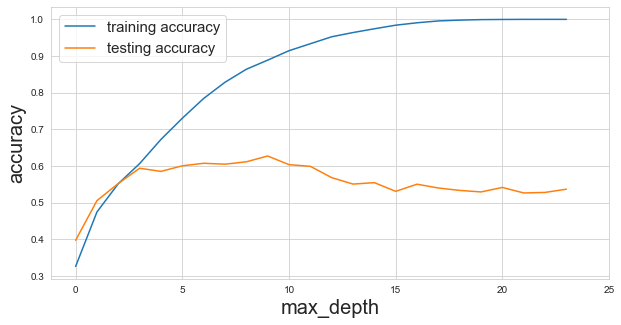

In [29]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(training_accuracy,label="training accuracy")
plt.plot(testing_accuracy,label="testing accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [30]:
my_final_tree=tree.DecisionTreeRegressor(max_depth=9)
my_final_tree=my_final_tree.fit(X_train,y_train)

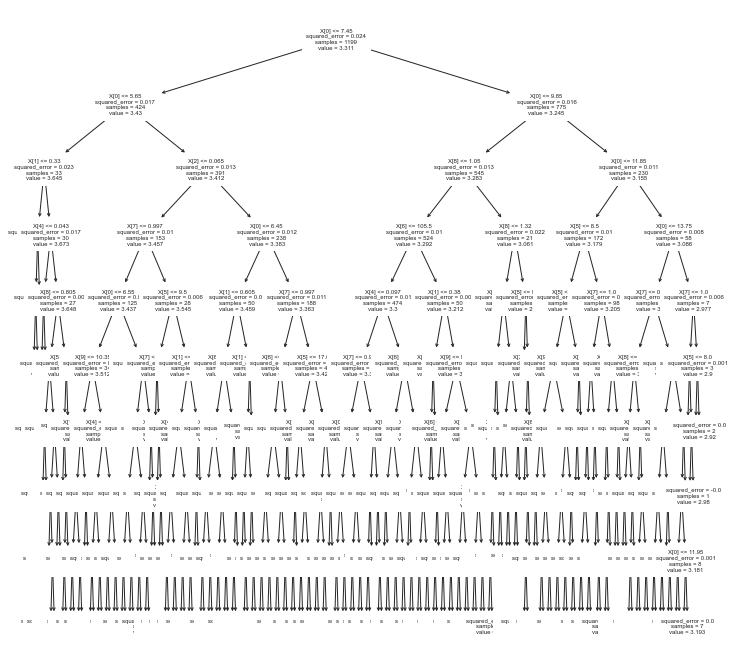

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plt.title("Decision tree trained on all the iris features")
tree.plot_tree(my_final_tree, fontsize=6)
plt.savefig('reg_tree_high_dpi', dpi=100)
plt.show()

Not so beautiful or imformative figure but yeah, this is how it gets splitted!